In [ ]:
'''
K-Mean Clustering Algorithm:

Defintion: 
- K-means clustering is an unsupervised machine learning algorithm used to partition a dataset 
    into K distinct clusters based on feature similarity. 
- The algorithm aims to minimize the variance within each cluster while maximizing the variance 
    between different clusters.

Geometric Intuition:
- Imagine you have a set of data points in a multi-dimensional space.
- K-means clustering works by iteratively assigning data points to the nearest cluster center (centroid) 
    and then updating the centroids based on the mean of the assigned points.
- The process continues until the centroids no longer change significantly or 
    a predefined number of iterations is reached.
- The result is a set of clusters where data points within each cluster are more similar to each other
    than to those in other clusters.

    
K- means steps:
1. Initialize K centroids randomly from the dataset.
2. Assign each data point to the nearest centroid based on a distance metric 
    (e.g., Euclidean distance or Manhattan).
3. Update the centroids by calculating the mean of all data points assigned to each centroid.
    (Move centroids to the mean of the points assigned to them.)
4. Repeat steps 2 and 3 until convergence (i.e., centroids do not change significantly or 
    a maximum number of iterations is reached).
- The algorithm is sensitive to the initial placement of centroids, so it may be beneficial to 
run the algorithm multiple times with different initializations and choose the best result based on a metric like inertia.
- The K-means algorithm is efficient and widely used for clustering tasks, 
but it assumes that clusters are spherical and equally sized, which may not always be the case in real-world data.
'''

In [ ]:
'''

How to select K values:

a. Elbow Method:
- The "Elbow Method" is a common technique to determine the optimal number of clusters (K) in K-means clustering.
- It involves plotting the sum of squared distances (inertia) between data points and their assigned cluster centroids 
  as a function of K.
- The idea is to identify the point where adding more clusters does not significantly reduce the inertia,
  which is often visualized as an "elbow" in the plot.
- The optimal K is typically chosen at the point where the inertia starts to level off, indicating that
adding more clusters does not provide substantial improvement in clustering quality.
- Term WCSS (Within-Cluster Sum of Squares) is often used interchangeably with inertia,
  and it represents the sum of squared distances between data points and their assigned cluster centroids.  

Euclidean Distance:
- Euclidean distance is a commonly used distance metric in K-means clustering.
- It measures the straight-line distance between two points in a multi-dimensional space.
- The formula for Euclidean distance between two points \(A(x_1, y_1, z_1)\) and \(B(x_2, y_2, z_2)\) in 3D space is:
\[d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}\]

Manhattan Distance:
- Manhattan distance, also known as L1 distance or taxicab distance, is another distance metric used in K-means clustering.
- It measures the distance between two points by summing the absolute differences of their coordinates.
- The formula for Manhattan distance between two points \(A(x_1, y_1, z_1)\) and \(B(x_2, y_2, z_2)\) in 3D space is:
\[d(A, B) = |x_2 - x_1| + |y_2 - y_1| + |z_2 - z_1|\]

  '''


In [ ]:
'''
Random Initialization Trap:
- The K-means algorithm is sensitive to the initial placement of centroids.
- If the initial centroids are poorly chosen, the algorithm may converge to a suboptimal solution.
(suboptimal solution means that the clusters formed may not represent the true structure of the data well.)
- To mitigate this issue, the K-means++ initialization method is often used, 
    which selects initial centroids in a way that spreads them out across the data space.
- K-means++ initialization helps improve the quality of clustering by ensuring that 
    initial centroids are well-distributed, reducing the likelihood of poor convergence.

How it works:
- K-means++ selects the first centroid randomly from the data points.
- For each subsequent centroid, it chooses a data point that is farthest from the existing centroids, 
  based on the squared Euclidean distance.
- This process continues until K centroids are selected.
- Then the K-means algorithm proceeds with the standard steps of assigning points to the nearest centroid
   and updating centroids based on the assigned points.
- This initialization strategy helps ensure that the initial centroids are well-separated,
    which can lead to better clustering results and faster convergence.


'''

In [1]:
# Implementation of K-Mean Clustering Algorithm
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [2]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [3]:
X

array([[ 2.33910881, -5.97527271],
       [-7.28429106,  3.95662844],
       [-7.37623212,  5.21448915],
       ...,
       [-8.47332587,  6.04992959],
       [-9.74928153,  3.48742898],
       [-8.01593464,  4.78704068]], shape=(1000, 2))

In [4]:
y

array([2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1,
       0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1,
       2, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1,
       1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2,
       2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1,
       1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1,

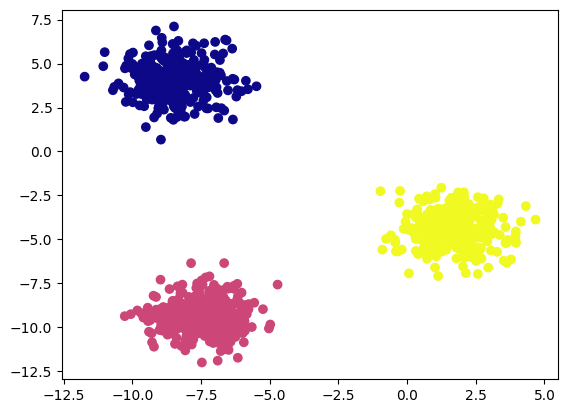

In [7]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='plasma')

In [9]:
# standardization = feature scaling technique
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# X_trained_scaled fit and transform because we want to fit the scaler on the training data
X_trained_scaled = scaler.fit_transform(X_train)
# X_test_scaled has only transform because we want to use the same scaling parameters from the training data
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.cluster import KMeans

In [15]:
# elbow method to find optimal K
inertia = []
K_range = range(1, 11)  # Testing K values from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_trained_scaled)
    inertia.append(kmeans.inertia_)

In [16]:
inertia

[1600.0000000000005,
 825.7900514544223,
 58.60807490955493,
 51.27214623857626,
 43.75747305898882,
 36.383133092175136,
 32.51801873775306,
 29.853112507127264,
 27.121289878963346,
 24.335029418266828]

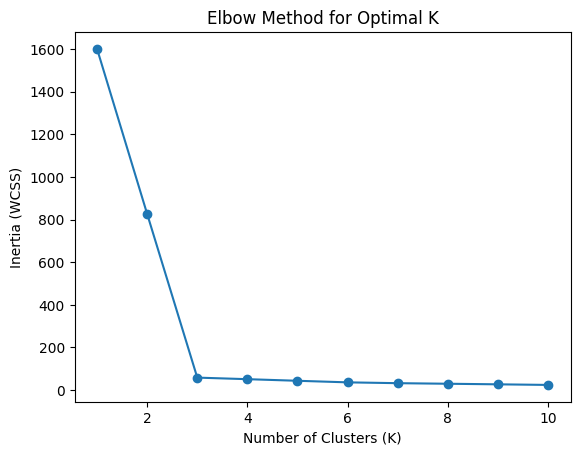

In [17]:
## plot elbow curve
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [19]:
kmeans.fit_predict(X_trained_scaled)

array([0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 2, 2, 1, 1,
       1, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 2,
       0, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 0, 0,
       2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1,
       1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0,
       0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2,

In [21]:
y_pred = kmeans.predict(X_test_scaled)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 1,
       2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2,
       1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1,
       1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0,
       1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1,
       1, 0], dtype=int32)

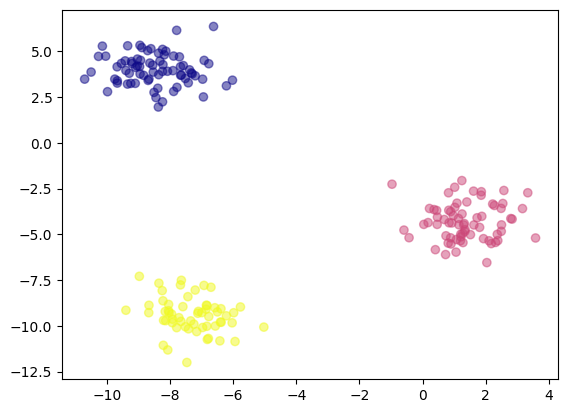

In [22]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='plasma', alpha=0.5)

In [28]:
# Validation of K - Value
# kneelocator
# silhouette score
from sklearn.metrics import silhouette_score
# Calculate silhouette score
silhouette_avg = []
for kn in range(2, 11):
    kmeans = KMeans(n_clusters=kn, init='k-means++')
    kmeans.fit(X_trained_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X_trained_scaled, cluster_labels))


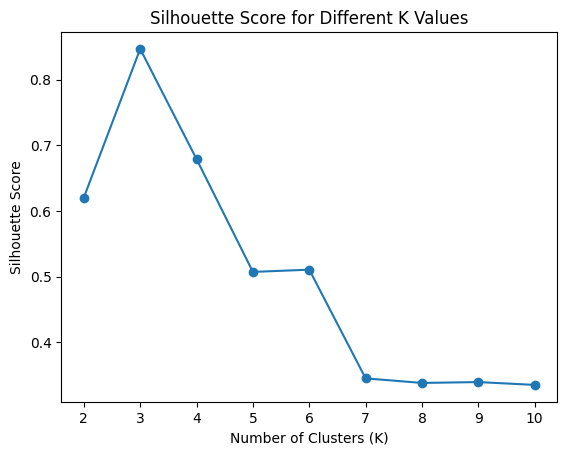

In [29]:
# plot silhouette scores
plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.show()

In [26]:
## Kneelocator
# The "KneeLocator" is a tool used to find the optimal number of clusters (K) in K-means clustering.
# It helps identify the "knee" point in the inertia plot, which corresponds to the optimal K value.
from kneed import KneeLocator

In [27]:
kl = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
kl.elbow

np.int64(3)

: 